In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['image.cmap']='gray'

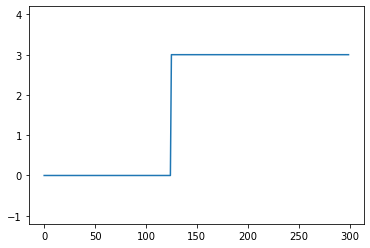

In [184]:
step_signal= np.zeros(300)
step_signal[125:]=3
fig,ax = plt.subplots()
ax.plot(step_signal)
ax.margins(y=0.4)

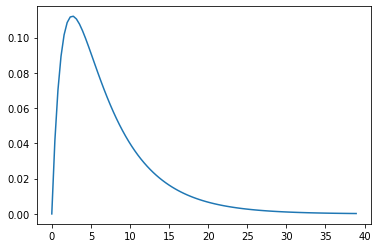

In [194]:
from scipy import signal
import matplotlib.pyplot as plt

system = ([1.0], [8.0, 7.0, 1.0])
t,y = signal.impulse2(system)
plt.plot(t,y)

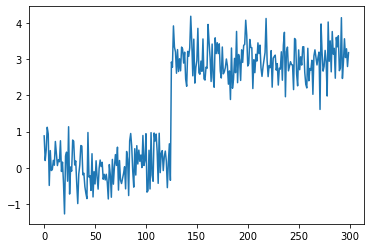

In [200]:
np.random.seed(0)
noisy_signal = (step_signal
               + np.random.normal(0, 0.50, step_signal.shape))
fig, ax =plt.subplots()
ax.plot(noisy_signal);

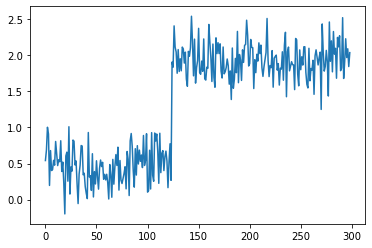

In [26]:
smooth_signal=(noisy_signal [:1]+ noisy_signal[1:])/2.0
fig, ax=plt.subplots()
ax.plot(smooth_signal)

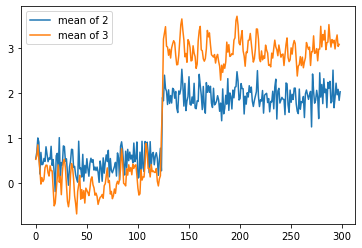

In [61]:
smooth_signal3=(noisy_signal[:-2] + noisy_signal [1:-1]
               + noisy_signal[2:])/3
fig,ax=plt.subplots()
ax.plot(smooth_signal, label='mean of 2')
ax.plot(smooth_signal3,label='mean of 3')
ax.legend(loc='upper left');

In [48]:
mean_kernel3 = np.full (3, 1/3)
print (mean_kernel3)


[0.33333333 0.33333333 0.33333333]


smooth_signal3 and smooth_signal3p are equal : True


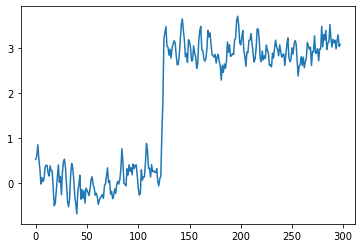

In [46]:
mean_kernel3 = np.full (3, 1/3)
smooth_signal3p = np.convolve(noisy_signal, mean_kernel3,
                              mode='valid')
fig, ax = plt.subplots()
ax.plot(smooth_signal3p)

print('smooth_signal3 and smooth_signal3p are equal :',
      np.allclose(smooth_signal3, smooth_signal3p))

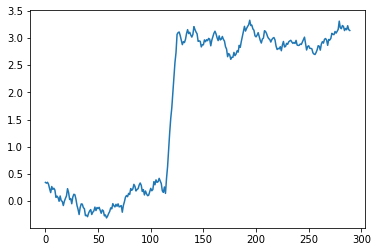

In [49]:
mean_kernel11 = np.full (11, 1/11)
smooth_signal11= np.convolve(noisy_signal, mean_kernel11,
                              mode='valid')
fig, ax = plt.subplots()
ax.plot(smooth_signal11);

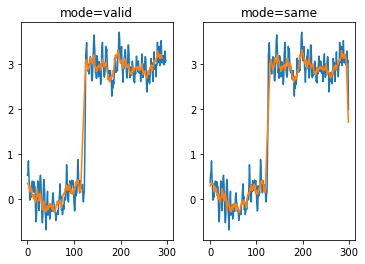

In [57]:
smooth_signal3same=np.convolve(noisy_signal, mean_kernel3,
                              mode='same')
smooth_signal11same=np.convolve(noisy_signal, mean_kernel11,
                              mode='same')

fig,ax = plt.subplots(1, 2)
ax[0].plot(smooth_signal3p)
ax[0].plot(smooth_signal11)
ax[0].set_title('mode=valid')
ax[1].plot(smooth_signal3same)
ax[1].plot(smooth_signal11same)
ax[1].set_title('mode=same');


In [58]:
from scipy.ndimage import convolve

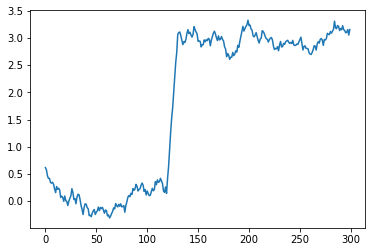

In [65]:
smooth_ndi=convolve(noisy_signal, mean_kernel11, mode='reflect')

fig, ax= plt.subplots()
ax.plot(smooth_ndi)

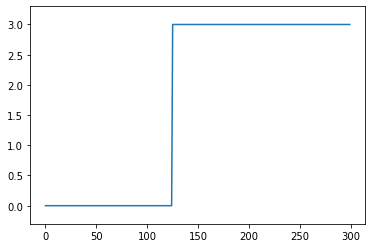

In [64]:
fig, ax=plt.subplots()
ax.plot(step_signal)
ax.margins(y=0.1)


In [93]:
result= np.convolve(step_signal,np.array([-1, 3, 2]),
                    mode='valid')

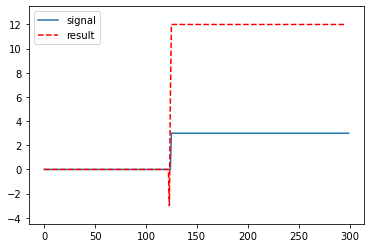

In [94]:
fig, ax= plt.subplots()
ax.plot(step_signal, label='signal')
ax.plot(result, color='red',linestyle='dashed', label='result')
ax.legend(loc='upper left')
ax.margins(y=0.1)

In [102]:
result2= np.convolve(step_signal,np.array([1, 3, -2]),
                    mode='valid')

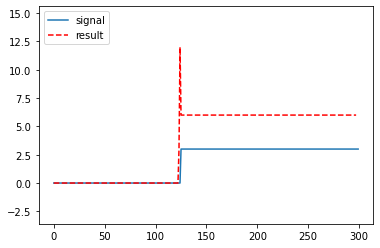

In [103]:
fig, ax= plt.subplots()
ax.plot(step_signal, label='signal')
ax.plot(result2, color='red',linestyle='dashed', label='result')
ax.legend(loc='upper left')
ax.margins(y=0.3)

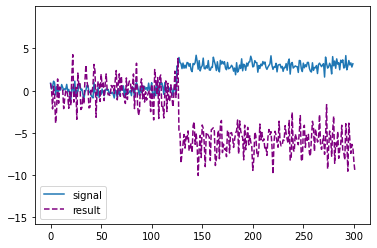

In [117]:
noisy_change = np.convolve(noisy_signal, np.array([1, 0, -3]))
fig, ax= plt.subplots()
ax.plot(noisy_signal, label='signal')
ax.plot(noisy_change, color='purple',linestyle='dashed', label='result')
ax.legend(loc='lower left')
ax.margins(y=0.4)
                           

In [123]:
mean_diff= np.convolve ([1,0,-2],[1/3, 1/3, 1/3], mode='full')
print (mean_diff)

[ 0.33333333  0.33333333 -0.33333333 -0.66666667 -0.66666667]


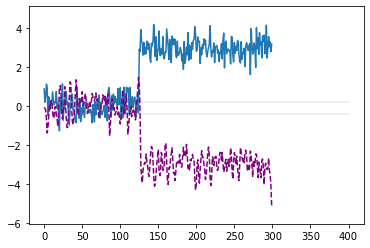

In [140]:
smooth_change = np.convolve(noisy_signal, mean_diff,
                           mode='same')

fig, ax= plt.subplots()
ax.plot(noisy_signal, label='signal')
ax.plot(smooth_change, color='purple',linestyle='dashed', label='change')
ax.margins(y=0.1)
ax.hlines([-0.4, 0.2], 0, 400, linewidth=0.2, color='brown');

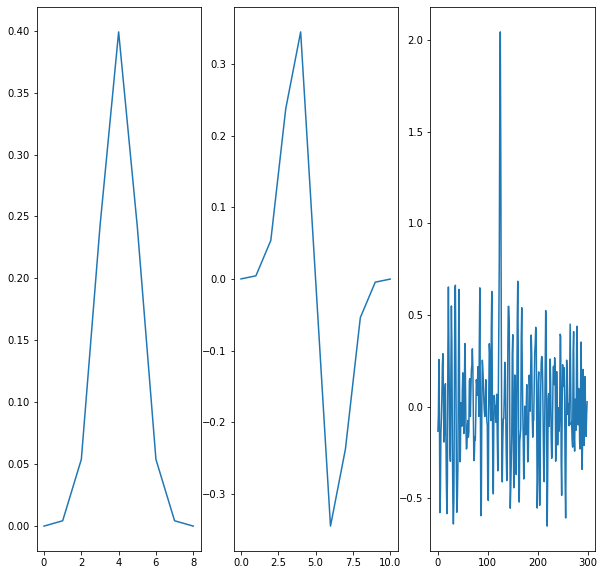

In [168]:
k= 1 / np.sqrt(2 * np.pi) * np.exp(-(np.arange(9)-4)**2/2)
fig, ax=plt.subplots(1, 3, figsize=(10, 10))
ax[0].plot(k)             

smooth_diff = np.convolve(k, [1,0,-1],mode='full')
ax[1].plot(smooth_diff)   

smooth_diff_signal=convolve(noisy_signal, smooth_diff)
ax[2].plot(smooth_diff_signal)   

In [201]:
import numpy as np

bright_square = np.zeros ((9,9), dtype=float)
bright_square[1:7, 4:7]=1
print(bright_square)

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


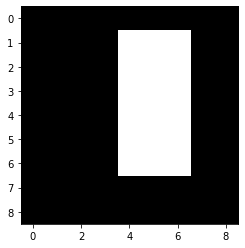

In [202]:
fig, ax=plt.subplots()
ax.imshow(bright_square);

In [208]:
mean_kernel=np.full((3,3),1/6)

print(mean_kernel)

[[0.16666667 0.16666667 0.16666667]
 [0.16666667 0.16666667 0.16666667]
 [0.16666667 0.16666667 0.16666667]]


In [209]:
import scipy.ndimage as ndi

print(bright_square)
print(ndi.convolve(bright_square,mean_kernel))

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.         0.         0.         0.16666667 0.33333333 0.5
  0.33333333 0.16666667 0.        ]
 [0.         0.         0.         0.33333333 0.66666667 1.
  0.66666667 0.33333333 0.        ]
 [0.         0.         0.         0.5        1.         1.5
  1.         0.5        0.        ]
 [0.         0.         0.         0.5        1.         1.5
  1.         0.5        0.        ]
 [0.         0.         0.         0.5        1.         1.5
  1.         0.5        0.        ]
 [0.         0.         0.         0.5        1.         1.5
  1.         0.5        0.        ]
 [0.         0.         0.         0.33333333 0.66666667 1.
  0.66666667 0.33333333 0.        ]
 [0.         0.         0.         0.16666667 0.3333

In [214]:
from skimage import color
from scipy import ndimage as ndi
from matplotlib import patches

def mean_filter_dome(image, vmax=1):
    mean_factor=1.0/9.0
    iter_kernel_and_subimage=iter_kernel(image)
    
    image_cache=[]
    
    def mean_filter_step(i_step):
        while i_step >=len(image_cache):
            filtered=image if i_step == 0 else image_cache[-1][-1][-1]
            filtered=filtered.copy()
            
            (i,j).mask, subimage=next(iter_kernel_and_subimage)
            filter_overlay=color.label2rgb(mask, image, bg_label=0,
                                           colors=('purple', 'red'))
            filtered[i,j]=np.sum(mean_factor*subimage)
            image_cache.append(((i,j),(filter_overlay, filtered)))
            
            (i,j), image = image_cache[i_step]
            fig, axes = plt.subplots(1, len(images), figsize(10,5))
            
            for ax, imc in zip(axes, image):
                ax.imshow(imc,vmax=vmax)
                rect= patches. Rectangle([j - 0.5, i-0.5], 1,1, color='yellow', fill=Fa)
                ax.add_patch(react)
                
                
                
               
            
            
            
    
    
    